# Machine Learning Advanced

## Aprendizaje Supervisado - Preprocesamiento

Manuel Montoya - `manuel.montoya@pucp.edu.pe`

## Caso de uso

<img src = 'https://datahack-prod.s3.ap-south-1.amazonaws.com/__sized__/contest_cover/loanpre-thumbnail-1200x1200.png'>

Loan Prediction: https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/#About

## Importación de librerías

In [1]:
import pandas as pd
import numpy as np
import sklearn

import seaborn as sns

In [2]:
pd.__version__

'1.0.5'

In [3]:
sklearn.__version__

'0.24.1'

In [4]:
sns.__version__

'0.11.0'

In [3]:
import warnings

In [4]:
warnings.filterwarnings('ignore')

Usamos una semilla a lo largo de todo el notebook para los procesos aleatorios

In [5]:
seed = 12345

## Lectura de bases

In [6]:
data_creditos = pd.read_csv('loan_prediction.csv')

In [7]:
data_creditos.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
data_creditos.shape

(614, 13)

In [11]:
data_creditos.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### existen nulos?

In [12]:
data_creditos.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
data_creditos.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
data_creditos.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [15]:
data_creditos.describe(percentiles=[0.9, 0.925, 0.95, 0.975, 0.99])

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
90%,9459.900000,3782.200000,235.800000,360.00000,1.000000
92.5%,10752.075000,4300.025000,259.000000,360.00000,1.000000
95%,14583.000000,4997.400000,297.800000,360.00000,1.000000
97.5%,17948.875000,6666.675000,384.500000,363.00000,1.000000
99%,32540.410000,8895.890000,496.360000,480.00000,1.000000


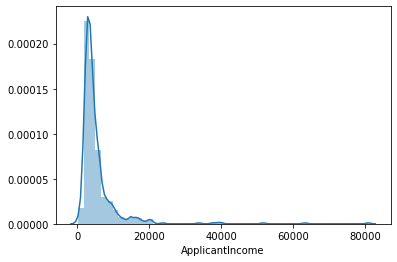

In [10]:
# sns.histplot(data = data_creditos, x = 'ApplicantIncome')
sns.distplot(data_creditos['ApplicantIncome'])

In [17]:
data_creditos.describe(include = 'object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002833,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [18]:
data_creditos['Dependents'].value_counts(dropna = False)

0      345
1      102
2      101
3+      51
NaN     15
Name: Dependents, dtype: int64

In [19]:
data_creditos.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [20]:
data_creditos['Loan_Status'] = data_creditos['Loan_Status'].map({'Y': 0, 'N': 1})

In [21]:
data_creditos.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,0


In [22]:
data_creditos['Dependents'] = data_creditos['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})

In [23]:
data_creditos['Dependents'].value_counts(dropna = False)

0.0    345
1.0    102
2.0    101
3.0     51
NaN     15
Name: Dependents, dtype: int64

In [24]:
data_creditos.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,0
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,1
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,0
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,0
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,0


In [25]:
data_creditos['Dependents'].mean()

0.7629382303839732

In [26]:
data_creditos['Dependents'].median()

0.0

In [27]:
data_creditos['Dependents'].mode()

0    0.0
dtype: float64

In [28]:
data_creditos.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,0
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,1
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,0
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,0
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,0


In [29]:
data_creditos['Married'].value_counts(dropna = False)

Yes    398
No     213
NaN      3
Name: Married, dtype: int64

In [30]:
data_creditos['Credit_History'].value_counts(dropna = False)

1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64

In [31]:
import missingno as msno

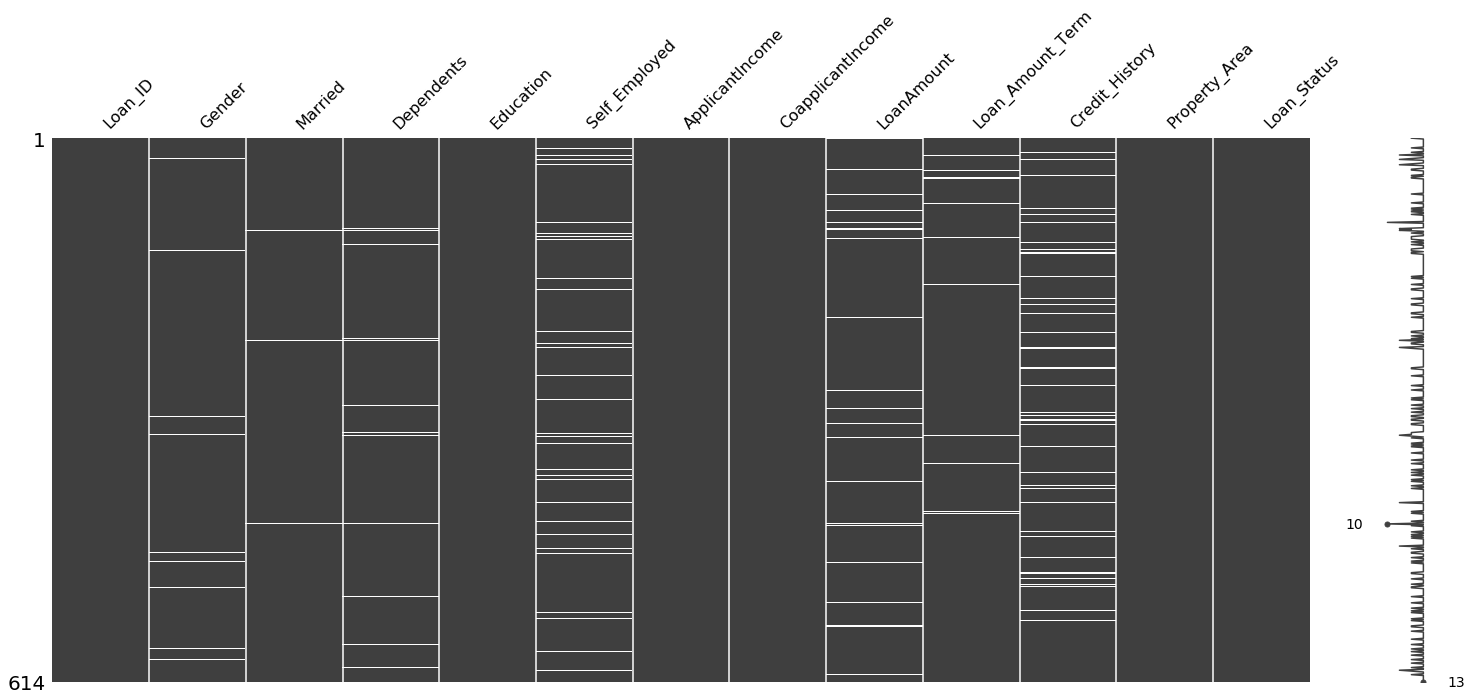

In [32]:
msno.matrix(data_creditos)

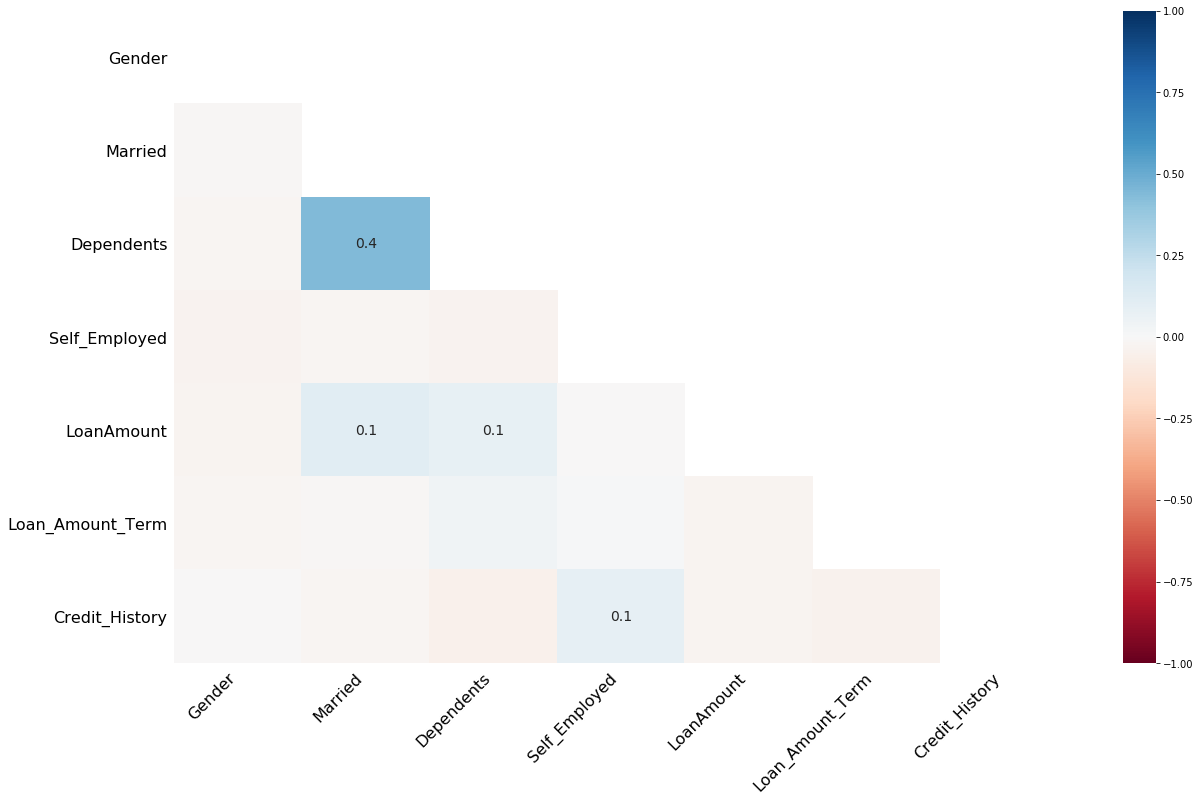

In [33]:
msno.heatmap(data_creditos)

In [34]:
data_creditos.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,0
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,1
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,0
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,0
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,0


## train test split

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X = data_creditos.drop(['Loan_ID', 'Loan_Status'], axis = 1)
y = data_creditos['Loan_Status']

In [37]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [38]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Loan_Status, dtype: int64

tasa de target

In [39]:
y.value_counts()

0    422
1    192
Name: Loan_Status, dtype: int64

In [40]:
192 / (192 + 422)

0.3127035830618892

In [41]:
y.mean()

0.3127035830618892

In [42]:
X.shape, y.shape

((614, 11), (614,))

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12345, stratify=y)

In [44]:
X_train.shape, y_train.shape

((491, 11), (491,))

In [45]:
X_test.shape, y_test.shape

((123, 11), (123,))

In [46]:
y_train.mean()

0.3136456211812627

In [47]:
y_test.mean()

0.3089430894308943

In [48]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
209,Male,No,0.0,Graduate,No,3418,0.0,127.0,360.0,1.0,Semiurban
426,Female,No,1.0,Not Graduate,No,4606,0.0,81.0,360.0,1.0,Rural
486,Male,No,2.0,Graduate,No,3547,0.0,80.0,360.0,0.0,Rural
434,Male,No,0.0,Graduate,No,3750,0.0,100.0,360.0,1.0,Urban
376,Male,Yes,3.0,Graduate,No,8750,4996.0,130.0,360.0,1.0,Rural


## imputación de nulos

In [49]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
209,Male,No,0.0,Graduate,No,3418,0.0,127.0,360.0,1.0,Semiurban
426,Female,No,1.0,Not Graduate,No,4606,0.0,81.0,360.0,1.0,Rural
486,Male,No,2.0,Graduate,No,3547,0.0,80.0,360.0,0.0,Rural
434,Male,No,0.0,Graduate,No,3750,0.0,100.0,360.0,1.0,Urban
376,Male,Yes,3.0,Graduate,No,8750,4996.0,130.0,360.0,1.0,Rural


In [50]:
X_train.isnull().sum()

Gender               12
Married               3
Dependents           14
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     13
Credit_History       36
Property_Area         0
dtype: int64

In [51]:
# en caso se quiera eliminar registros con nulos en columnas
# X_aux = X_train.dropna(subset = ['LoanAmount', 'Loan_Amount_Term'])
# X_aux.isnull().sum()

In [52]:
X_train.dtypes

Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [53]:
X_train_num = X_train.select_dtypes('number')
X_train_cat = X_train.select_dtypes('object')

numéricas

In [54]:
X_train_num.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
209,0.0,3418,0.0,127.0,360.0,1.0
426,1.0,4606,0.0,81.0,360.0,1.0
486,2.0,3547,0.0,80.0,360.0,0.0
434,0.0,3750,0.0,100.0,360.0,1.0
376,3.0,8750,4996.0,130.0,360.0,1.0


In [55]:
X_train_num.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [56]:
X_train_num.isnull().sum()

Dependents           14
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     13
Credit_History       36
dtype: int64

In [57]:
X_train_num.mean()

Dependents              0.784067
ApplicantIncome      5630.336049
CoapplicantIncome    1594.352179
LoanAmount            149.088795
Loan_Amount_Term      343.832636
Credit_History          0.832967
dtype: float64

In [58]:
X_train_num.median()

Dependents              0.0
ApplicantIncome      3814.0
CoapplicantIncome    1086.0
LoanAmount            128.0
Loan_Amount_Term      360.0
Credit_History          1.0
dtype: float64

In [59]:
from sklearn.impute import SimpleImputer

In [60]:
imputer_num = SimpleImputer(strategy = 'median')

In [61]:
imputer_num.fit(X_train_num)

SimpleImputer(strategy='median')

In [62]:
imputer_num.statistics_

array([0.000e+00, 3.814e+03, 1.086e+03, 1.280e+02, 3.600e+02, 1.000e+00])

In [63]:
imputer_num.transform(X_train_num)

array([[0.000e+00, 3.418e+03, 0.000e+00, 1.270e+02, 3.600e+02, 1.000e+00],
       [1.000e+00, 4.606e+03, 0.000e+00, 8.100e+01, 3.600e+02, 1.000e+00],
       [2.000e+00, 3.547e+03, 0.000e+00, 8.000e+01, 3.600e+02, 0.000e+00],
       ...,
       [0.000e+00, 3.727e+03, 1.775e+03, 1.310e+02, 3.600e+02, 1.000e+00],
       [0.000e+00, 5.116e+03, 1.451e+03, 1.650e+02, 3.600e+02, 0.000e+00],
       [0.000e+00, 6.096e+03, 0.000e+00, 2.180e+02, 3.600e+02, 0.000e+00]])

In [64]:
X_train_num_imputed = pd.DataFrame(data = imputer_num.transform(X_train_num), columns=X_train_num.columns)

In [65]:
X_train_num_imputed.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,3418.0,0.0,127.0,360.0,1.0
1,1.0,4606.0,0.0,81.0,360.0,1.0
2,2.0,3547.0,0.0,80.0,360.0,0.0
3,0.0,3750.0,0.0,100.0,360.0,1.0
4,3.0,8750.0,4996.0,130.0,360.0,1.0


In [66]:
X_train_num.isnull().sum()

Dependents           14
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     13
Credit_History       36
dtype: int64

In [67]:
X_train_num_imputed.isnull().sum()

Dependents           0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

categóricas

In [68]:
X_train_cat.head()

,Gender,Married,Education,Self_Employed,Property_Area
209,Male,No,Graduate,No,Semiurban
426,Female,No,Not Graduate,No,Rural
486,Male,No,Graduate,No,Rural
434,Male,No,Graduate,No,Urban
376,Male,Yes,Graduate,No,Rural


In [69]:
X_train_cat.isnull().sum()

Gender           12
Married           3
Education         0
Self_Employed    27
Property_Area     0
dtype: int64

In [70]:
imputer_cat = SimpleImputer(strategy = 'most_frequent')
imputer_cat.fit(X_train_cat)
X_train_cat_imputed = pd.DataFrame(data = imputer_cat.transform(X_train_cat), columns = X_train_cat.columns)

In [71]:
imputer_cat.statistics_

array(['Male', 'Yes', 'Graduate', 'No', 'Semiurban'], dtype=object)

In [72]:
X_train_cat_imputed.isnull().sum()

Gender           0
Married          0
Education        0
Self_Employed    0
Property_Area    0
dtype: int64

## tratamiento de valores atípicos

In [73]:
X_train_num_imputed.describe(percentiles = [0.01, 0.025, 0.05, 0.10, 0.25, 0.5, 0.75, 0.90, 0.95, 0.975, 0.99])

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,0.761711,5630.336049,1594.352179,148.315682,344.260692,0.845214
std,1.029286,6603.836947,3012.677226,87.184113,61.988258,0.362070
min,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000
1%,0.000000,967.400000,0.000000,35.900000,84.000000,0.000000
2.5%,0.000000,1606.250000,0.000000,50.000000,180.000000,0.000000
5%,0.000000,1885.000000,0.000000,61.000000,180.000000,0.000000
10%,0.000000,2213.000000,0.000000,75.000000,300.000000,0.000000
25%,0.000000,2897.000000,0.000000,104.000000,360.000000,1.000000
50%,0.000000,3814.000000,1086.000000,128.000000,360.000000,1.000000


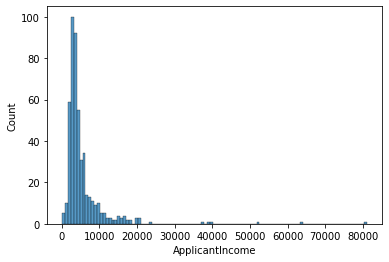

In [74]:
sns.histplot(data = X_train_num_imputed, x = 'ApplicantIncome')

In [75]:
X_train_num_imputed['log_Income'] = np.log10(X_train_num_imputed['ApplicantIncome'])

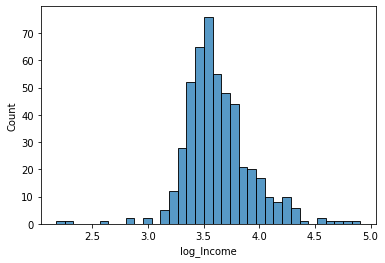

In [76]:
sns.histplot(data = X_train_num_imputed, x = 'log_Income')

In [80]:
p5_Income = np.percentile(X_train_num_imputed['ApplicantIncome'], 5)
p95_Income = np.percentile(X_train_num_imputed['ApplicantIncome'], 95)

p1_Income = np.percentile(X_train_num_imputed['ApplicantIncome'], 1)
p99_Income = np.percentile(X_train_num_imputed['ApplicantIncome'], 99)

In [82]:
p1_Income, p99_Income

(967.4000000000001, 37861.80000000003)

In [81]:
p5_Income, p95_Income

(1885.0, 14999.5)

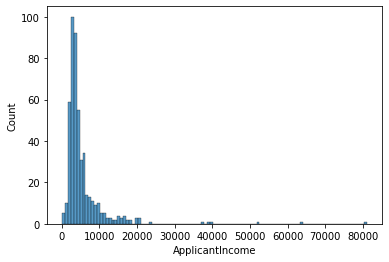

In [79]:
sns.histplot(data = X_train_num_imputed, x = 'ApplicantIncome')

In [86]:
X_train_num_imputed['ApplicantIncome_5'] = np.clip(X_train_num_imputed['ApplicantIncome'], p5_Income, p95_Income)
X_train_num_imputed['ApplicantIncome_1'] = np.clip(X_train_num_imputed['ApplicantIncome'], p1_Income, p99_Income)

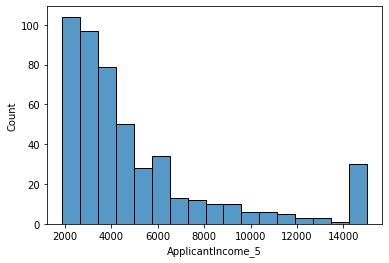

In [87]:
sns.histplot(data = X_train_num_imputed, x = 'ApplicantIncome_5')

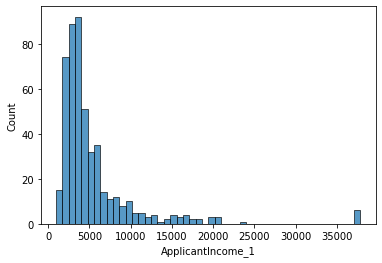

In [88]:
sns.histplot(data = X_train_num_imputed, x = 'ApplicantIncome_1')

## tratamiento de variables categóricas

In [89]:
X_train_cat_imputed.head()

,Gender,Married,Education,Self_Employed,Property_Area
0,Male,No,Graduate,No,Semiurban
1,Female,No,Not Graduate,No,Rural
2,Male,No,Graduate,No,Rural
3,Male,No,Graduate,No,Urban
4,Male,Yes,Graduate,No,Rural


In [92]:
X_train_cat_dummies = pd.get_dummies(X_train_cat_imputed)

In [93]:
X_train_cat_dummies.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,1,0,1,0,1,0,0,1,0
1,1,0,1,0,0,1,1,0,1,0,0
2,0,1,1,0,1,0,1,0,1,0,0
3,0,1,1,0,1,0,1,0,0,0,1
4,0,1,0,1,1,0,1,0,1,0,0


## consolidación

In [96]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
209,Male,No,0.0,Graduate,No,3418,0.0,127.0,360.0,1.0,Semiurban
426,Female,No,1.0,Not Graduate,No,4606,0.0,81.0,360.0,1.0,Rural
486,Male,No,2.0,Graduate,No,3547,0.0,80.0,360.0,0.0,Rural
434,Male,No,0.0,Graduate,No,3750,0.0,100.0,360.0,1.0,Urban
376,Male,Yes,3.0,Graduate,No,8750,4996.0,130.0,360.0,1.0,Rural


In [94]:
X_train_num_imputed.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,log_Income,ApplicantIncome_5,ApplicantIncome_1
0,0.0,3418.0,0.0,127.0,360.0,1.0,3.533772,3418.0,3418.0
1,1.0,4606.0,0.0,81.0,360.0,1.0,3.663324,4606.0,4606.0
2,2.0,3547.0,0.0,80.0,360.0,0.0,3.549861,3547.0,3547.0
3,0.0,3750.0,0.0,100.0,360.0,1.0,3.574031,3750.0,3750.0
4,3.0,8750.0,4996.0,130.0,360.0,1.0,3.942008,8750.0,8750.0


In [95]:
X_train_cat_dummies.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,1,0,1,0,1,0,0,1,0
1,1,0,1,0,0,1,1,0,1,0,0
2,0,1,1,0,1,0,1,0,1,0,0
3,0,1,1,0,1,0,1,0,0,0,1
4,0,1,0,1,1,0,1,0,1,0,0


In [98]:
X_train_num_imputed.shape, X_train_cat_dummies.shape

((491, 9), (491, 11))

In [97]:
X_train_consolidado = pd.concat([X_train_num_imputed, X_train_cat_dummies], axis = 1)

In [99]:
X_train_consolidado.shape

(491, 20)

In [100]:
X_train_consolidado.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,log_Income,ApplicantIncome_5,ApplicantIncome_1,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,3418.0,0.0,127.0,360.0,1.0,3.533772,3418.0,3418.0,0,1,1,0,1,0,1,0,0,1,0
1,1.0,4606.0,0.0,81.0,360.0,1.0,3.663324,4606.0,4606.0,1,0,1,0,0,1,1,0,1,0,0
2,2.0,3547.0,0.0,80.0,360.0,0.0,3.549861,3547.0,3547.0,0,1,1,0,1,0,1,0,1,0,0
3,0.0,3750.0,0.0,100.0,360.0,1.0,3.574031,3750.0,3750.0,0,1,1,0,1,0,1,0,0,0,1
4,3.0,8750.0,4996.0,130.0,360.0,1.0,3.942008,8750.0,8750.0,0,1,0,1,1,0,1,0,1,0,0


## estandarización

In [101]:
X_train_consolidado.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,log_Income,ApplicantIncome_5,ApplicantIncome_1,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,0.761711,5630.336049,1594.352179,148.315682,344.260692,0.845214,3.629801,5078.159878,5460.896130,0.183299,0.816701,0.329939,0.670061,0.796334,0.203666,0.861507,0.138493,0.274949,0.380855,0.344196
std,1.029286,6603.836947,3012.677226,87.184113,61.988258,0.362070,0.295082,3421.612907,5166.358437,0.387306,0.387306,0.470670,0.470670,0.403134,0.403134,0.345769,0.345769,0.446944,0.486092,0.475590
min,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,2.176091,1885.000000,967.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2897.000000,0.000000,104.000000,360.000000,1.000000,3.461948,2897.000000,2897.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3814.000000,1086.000000,128.000000,360.000000,1.000000,3.581381,3814.000000,3814.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,5945.000000,2253.500000,166.500000,360.000000,1.000000,3.774151,5945.000000,5945.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,4.908485,14999.500000,37861.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


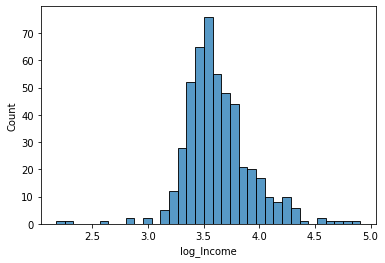

In [102]:
sns.histplot(data = X_train_consolidado, x = 'log_Income')

In [103]:
from sklearn.preprocessing import MinMaxScaler

In [104]:
scaler = MinMaxScaler()

In [105]:
scaler.fit(X_train_consolidado)

MinMaxScaler()

In [106]:
X_train_scaled = pd.DataFrame(data = scaler.transform(X_train_consolidado), columns = X_train_consolidado.columns)

In [108]:
X_train_consolidado.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,log_Income,ApplicantIncome_5,ApplicantIncome_1,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,3418.0,0.0,127.0,360.0,1.0,3.533772,3418.0,3418.0,0,1,1,0,1,0,1,0,0,1,0
1,1.0,4606.0,0.0,81.0,360.0,1.0,3.663324,4606.0,4606.0,1,0,1,0,0,1,1,0,1,0,0
2,2.0,3547.0,0.0,80.0,360.0,0.0,3.549861,3547.0,3547.0,0,1,1,0,1,0,1,0,1,0,0
3,0.0,3750.0,0.0,100.0,360.0,1.0,3.574031,3750.0,3750.0,0,1,1,0,1,0,1,0,0,0,1
4,3.0,8750.0,4996.0,130.0,360.0,1.0,3.942008,8750.0,8750.0,0,1,0,1,1,0,1,0,1,0,0


In [107]:
X_train_scaled.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,log_Income,ApplicantIncome_5,ApplicantIncome_1,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.000000,0.040421,0.000000,0.170767,0.72973,1.0,0.496883,0.116894,0.066422,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.333333,0.055114,0.000000,0.104197,0.72973,1.0,0.544297,0.207480,0.098622,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,0.666667,0.042016,0.000000,0.102750,0.72973,0.0,0.502772,0.126730,0.069918,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.000000,0.044527,0.000000,0.131693,0.72973,1.0,0.511617,0.142209,0.075421,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.000000,0.106370,0.119903,0.175109,0.72973,1.0,0.646289,0.523466,0.210943,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [109]:
X_train_scaled.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,log_Income,ApplicantIncome_5,ApplicantIncome_1,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,0.253904,0.067784,0.038264,0.201615,0.694281,0.845214,0.532028,0.243483,0.121793,0.183299,0.816701,0.329939,0.670061,0.796334,0.203666,0.861507,0.138493,0.274949,0.380855,0.344196
std,0.343095,0.081680,0.072304,0.126171,0.139613,0.362070,0.107994,0.260903,0.140031,0.387306,0.387306,0.470670,0.470670,0.403134,0.403134,0.345769,0.345769,0.446944,0.486092,0.475590
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.033976,0.000000,0.137482,0.729730,1.000000,0.470597,0.077166,0.052301,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.045318,0.026064,0.172214,0.729730,1.000000,0.514307,0.147089,0.077155,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.666667,0.071676,0.054084,0.227931,0.729730,1.000000,0.584857,0.309581,0.134915,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


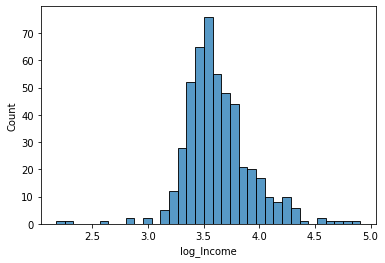

In [110]:
sns.histplot(data = X_train_consolidado, x = 'log_Income')

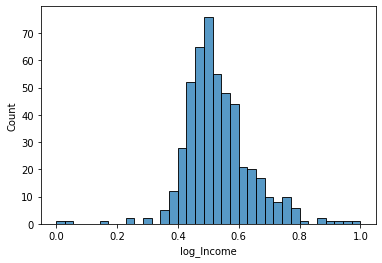

In [111]:
sns.histplot(data = X_train_scaled, x = 'log_Income')